# Dogs_vs_Cats_CNN
구글 드라이브 마운트 하고 시작

In [737]:
!ls

dogs-vs-cats  drive  model  sample_data  train.zip


In [738]:
# !cp ./drive/MyDrive/Colab\ Notebooks/train.zip .

In [739]:
# !unzip -qq train.zip -d dogs-vs-cats

In [740]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [741]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical 
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [742]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

##Train set 만들기

In [743]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [744]:
!ls

dogs-vs-cats  drive  model  sample_data  train.zip


In [745]:
path = './dogs-vs-cats/train/'

In [746]:
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [747]:
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [748]:
classes = ['dog', 'cat']

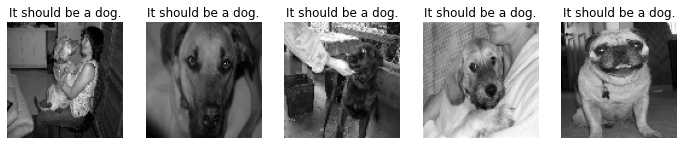

In [749]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title(f'It should be a {classes[0]}.')        
plt.show()

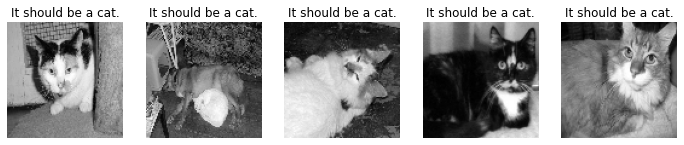

In [750]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title(f'It should be a {classes[1]}.')
plt.show()

In [751]:
# class에 따라 0과 1을 labeling 
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [752]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [753]:
X_train = np.concatenate((dogs,cats),axis=0)
y_train = np.concatenate((y_dogs,y_cats),axis=0)

In [754]:
len(X_train)

2222

In [755]:
# One-Hot Encoding
y_train = to_categorical(y_train, 2)

In [756]:
y_train[-1]

array([1., 0.], dtype=float32)

## Test set 만들기

In [757]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [758]:
dog_path = os.path.join(path,'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [759]:
cat_path = os.path.join(path,'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [760]:
# class에 따라 0과 1을 labeling 
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [761]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [762]:
dogs.shape

(611, 96, 96, 1)

In [763]:
X_test = np.concatenate((dogs, cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [764]:
# One-Hot Encoding
y_test = to_categorical(y_test, 2)

##모델 설계

In [765]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 100
VERBOSE = 2
VALIDAION_SPLIT = 0.2
OPTIM = Adam()
N_CLASSES = len(classes)

In [766]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    # BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    # BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

In [767]:
print('The model was created by following config:')
model.summary()

The model was created by following config:
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 48, 48, 64)        36928     
_________________________________________________________________
max_poolin

In [768]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [769]:
!ls

dogs-vs-cats  drive  model  sample_data  train.zip


In [770]:
modelpath = "./model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=15)

## 모델 학습

In [771]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, 
          validation_split=0.25,
          callbacks=[checkpointer, early_stopping_callback])

Epoch 1/100
53/53 [==============================] - 2s 31ms/step - loss: 1.0451 - accuracy: 0.5677 - val_loss: 1.1327 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1.13275, saving model to ./model/dogs_vs_cats-cnn-01-1.1327.hdf5
Epoch 2/100
53/53 [==============================] - 1s 25ms/step - loss: 0.6286 - accuracy: 0.6682 - val_loss: 1.0443 - val_accuracy: 0.0162

Epoch 00002: val_loss improved from 1.13275 to 1.04432, saving model to ./model/dogs_vs_cats-cnn-02-1.0443.hdf5
Epoch 3/100
53/53 [==============================] - 1s 25ms/step - loss: 0.6444 - accuracy: 0.6529 - val_loss: 0.8996 - val_accuracy: 0.2068

Epoch 00003: val_loss improved from 1.04432 to 0.89961, saving model to ./model/dogs_vs_cats-cnn-03-0.8996.hdf5
Epoch 4/100
53/53 [==============================] - 1s 25ms/step - loss: 0.6343 - accuracy: 0.6779 - val_loss: 1.2840 - val_accuracy: 0.1115

Epoch 00004: val_loss did not improve from 0.89961
Epoch 5/100
53/53 [======================

In [779]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/dogs_vs_cats-cnn-06-0.6669.hdf5')

In [780]:
best_model_acc = best_model.evaluate(X_test, y_test)
acc = model.evaluate(X_test, y_test)
print(f"Best Model Accuracy: {best_model_acc[1]:.4f}")
print(f"Model Accuracy: {acc[1]:.4f}")

39/39 [==============================] - 0s 7ms/step - loss: 1.5054 - accuracy: 0.6072
Best Model Accuracy: 0.5745
Model Accuracy: 0.6072


In [774]:
# 검증셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']

# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

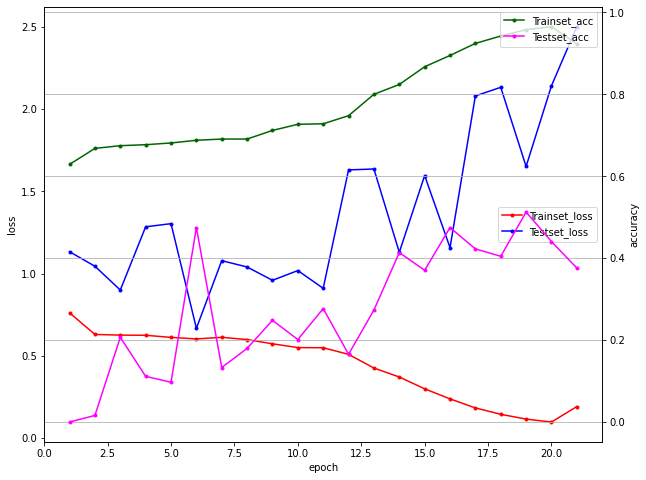

In [775]:
x_len = np.arange(1, len(y_loss)+1)
fig,ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, marker='.', c="red", label='Trainset_loss')
ax0.plot(x_len, y_vloss, marker='.', c="blue", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, marker='.', c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, marker='.', c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='center right')
ax1.legend(loc='upper right')
plt.grid()
plt.show;